In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing Raw Data

In [2]:
#Import file from path
file_path = 'C:/Users/clifford.osei/Documents/Fantasy-Premier-League/Fantasy-Premier-League/Data Collection/Datasets/raw_data_combined.csv'
training_data = pd.read_csv(file_path) 

In [3]:
#Load into dataframe
historical_data = training_data.copy()
historical_data

,Player Name,Team,Position,Pts,GS,A,CS,B,BPS,PPG,MP,Cost,TSB,GC,OG,PS,PM,Season
0,Sánchez,ARS,MID,264,24,11,13,32,834,6.9,3217,£11.7,29.7%,41,0,0,1,2016
1,Alli,TOT,MID,225,18,11,17,17,679,6.1,3036,£9.1,32.3%,22,0,0,0,2016
2,Hazard,CHE,MID,224,16,9,17,33,869,6.2,2985,£10.5,30.6%,29,0,0,1,2016
3,Kane,TOT,FWD,224,29,7,14,33,920,7.5,2523,£11.9,23.3%,19,0,0,1,2016
4,Lukaku,EVE,FWD,221,25,6,13,33,824,6.0,3266,£10.1,32.2%,42,0,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,Nwaneri,ARS,MID,0,0,0,0,0,0,0.0,0,£4.5,0.0%,0,0,0,0,2023
4705,Orford,WHU,MID,0,0,0,0,0,0,0.0,0,£4.5,0.0%,0,0,0,0,2023
4706,Casey,WHU,DEF,0,0,0,0,0,0,0.0,0,£4,0.0%,0,0,0,0,2023
4707,Bettinelli,CHE,GKP,-1,0,0,0,0,-3,0.0,0,£4,0.0%,0,0,0,0,2023


In [4]:
#historical_data.Season.dtype

Preprocessing of Data
- To conduct timeseires analysis, season column must be converted into desriable format
- Some rows contain symbols, remove from rows and into column headings
- Check for duplicate rows
- Check for null values

In [5]:
# Convert 'Season' column to datetime type with a fixed month and day (Taking 1st August as the start of the season)
desired_month = 8 
desired_day = 1 

historical_data['Season'] = pd.to_datetime(historical_data['Season'], format='%Y') + pd.DateOffset(months=desired_month-1, days=desired_day-1)

In [6]:
#historical_data.Season.dtype

In [7]:
# Rename and convert the 'Cost' and 'TSB' column
historical_data.rename(columns={'Cost': 'Cost(£M)'}, inplace=True)
historical_data['Cost(£M)'] = historical_data['Cost(£M)'].str.replace('£', '')
historical_data['Cost(£M)'] = historical_data['Cost(£M)'].astype(float)

historical_data.rename(columns={'TSB': 'TSB(%)'}, inplace=True)
historical_data['TSB(%)'] = historical_data['TSB(%)'].str.replace('%', '')
historical_data['TSB(%)'] = historical_data['TSB(%)'].astype(float)

In [27]:
historical_data.head(5)

,Player Name,Team,Position,Pts,GS,A,CS,B,BPS,PPG,MP,Cost(£M),TSB(%),GC,OG,PS,PM,Season
0,Sánchez,ARS,MID,264,24,11,13,32,834,6.9,3217,11.7,29.7,41,0,0,1,2016-08-01
1,Alli,TOT,MID,225,18,11,17,17,679,6.1,3036,9.1,32.3,22,0,0,0,2016-08-01
2,Hazard,CHE,MID,224,16,9,17,33,869,6.2,2985,10.5,30.6,29,0,0,1,2016-08-01
3,Kane,TOT,FWD,224,29,7,14,33,920,7.5,2523,11.9,23.3,19,0,0,1,2016-08-01
4,Lukaku,EVE,FWD,221,25,6,13,33,824,6.0,3266,10.1,32.2,42,0,0,0,2016-08-01


In [9]:
historical_data.Season.dtype

dtype('<M8[ns]')

In [10]:
#Checking for duplicates
duplicates = historical_data.duplicated().sum()

if duplicates is not None:
    historical_data.drop_duplicates(inplace=True)

print('Number of duplicate rows =', duplicates)

Number of duplicate rows = 0


In [11]:
#Checking if data has null values
historical_data.isnull().sum()

Player Name    0
Team           0
Position       0
Pts            0
GS             0
A              0
CS             0
B              0
BPS            0
PPG            0
MP             0
Cost(£M)       0
TSB(%)         0
GC             0
OG             0
PS             0
PM             0
Season         0
dtype: int64

In [12]:
# Save the pre-processed data to a new CSV file
# historical_data.to_csv('timeseries_data.csv', index=False)

Bivariate Analysis
- Examine relationships between multiple variables

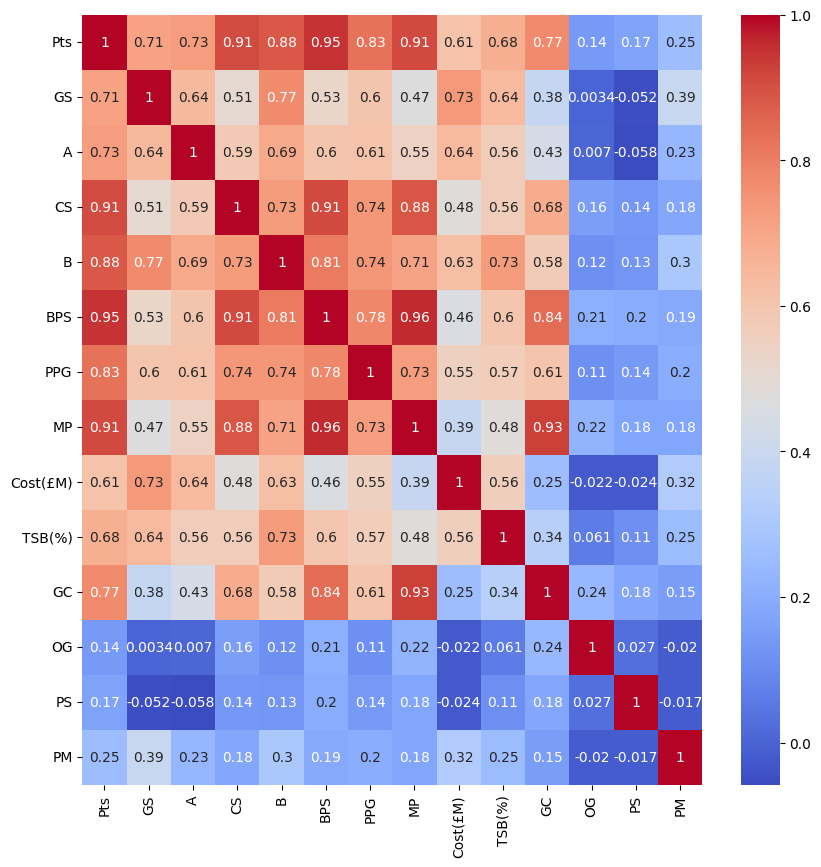

In [13]:
#Plot a correlation matrix
plt.figure(figsize=(10,10))
numeric_data = historical_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

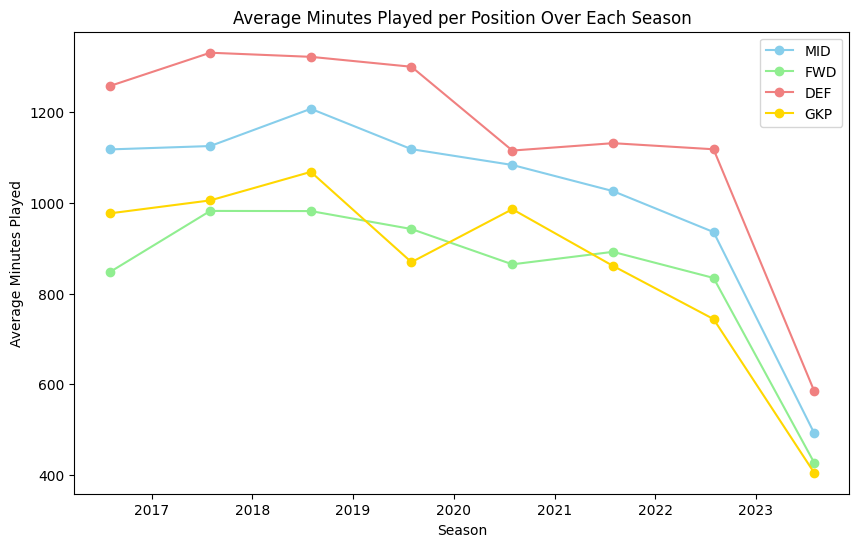

In [14]:
#Line graph for average minutes played per position over each season
plt.figure(figsize=(10, 6))

for position, color in zip(historical_data['Position'].unique(), ['skyblue', 'lightgreen', 'lightcoral', 'gold']):
    position_data = historical_data[historical_data['Position'] == position]
    avg_minutes_per_season = position_data.groupby('Season')['MP'].mean()
    plt.plot(avg_minutes_per_season.index, avg_minutes_per_season, label=position, marker='o', color=color)

plt.title('Average Minutes Played per Position Over Each Season')
plt.xlabel('Season')
plt.ylabel('Average Minutes Played')
plt.legend()
plt.show()

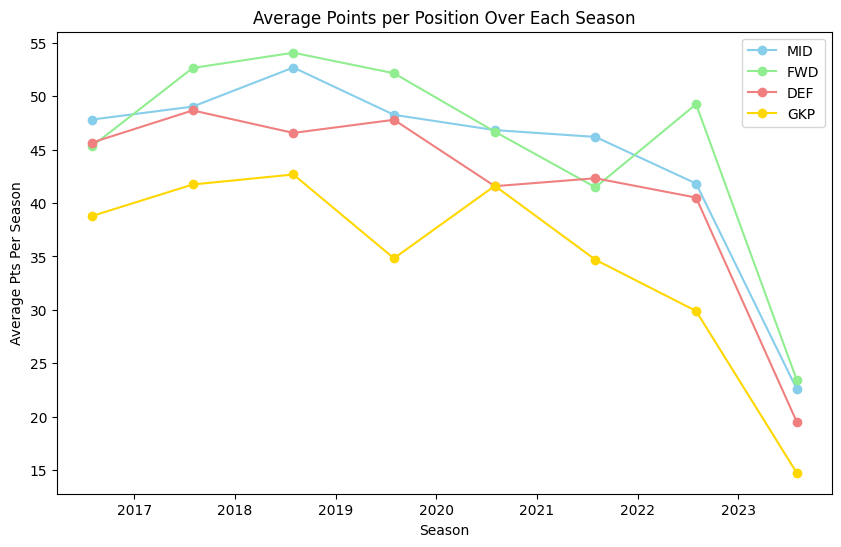

In [15]:
#Line graph for average minutes played per position over each season
plt.figure(figsize=(10, 6))

for position, color in zip(historical_data['Position'].unique(), ['skyblue', 'lightgreen', 'lightcoral', 'gold']):
    position_data = historical_data[historical_data['Position'] == position]
    avg_pts_per_season = position_data.groupby('Season')['Pts'].mean()
    plt.plot(avg_pts_per_season.index, avg_pts_per_season, label=position, marker='o', color=color)

plt.title('Average Points per Position Over Each Season')
plt.xlabel('Season')
plt.ylabel('Average Pts Per Season')
plt.legend()
plt.show()

Univariate Analysis
- Exploring statistics of single variables

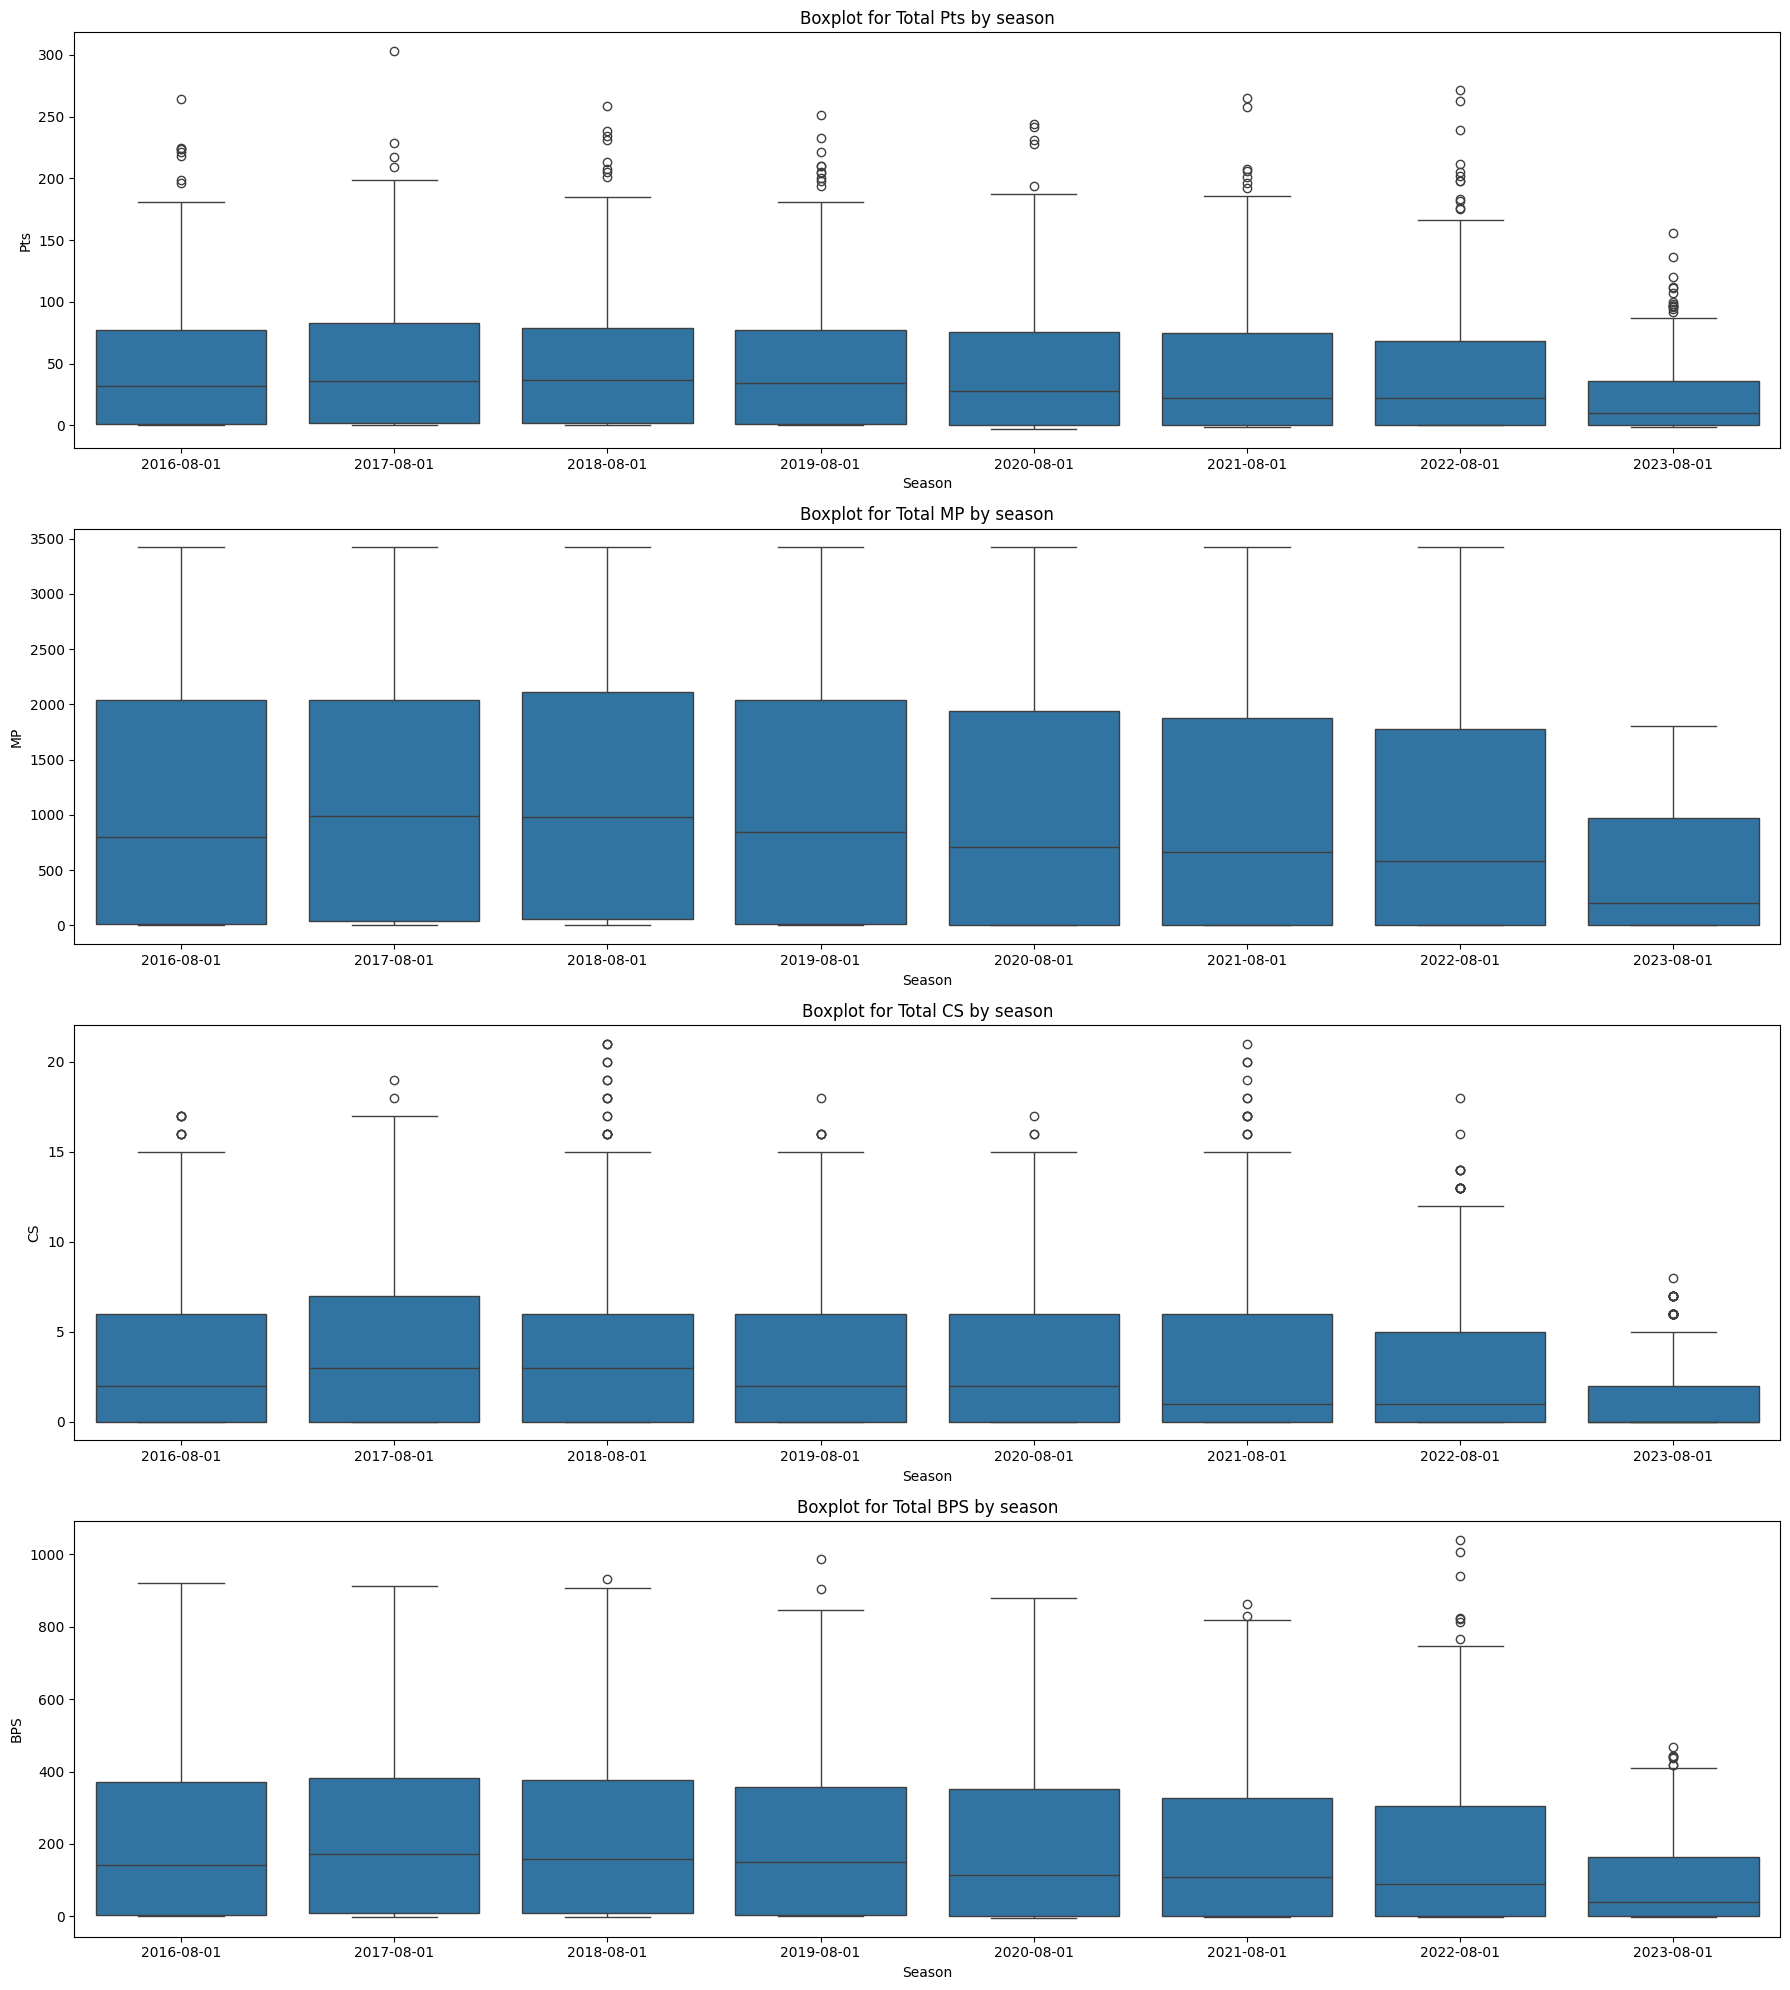

In [16]:
#Top correlated variables 
variables_to_plot = ['Pts', 'MP', 'CS', 'BPS'] 

#Subplots set-up
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=1, figsize=(18, 5 * len(variables_to_plot)))

# Plot boxplots for each variable
for i, variable in enumerate(variables_to_plot):
    sns.boxplot(x=historical_data['Season'], y=historical_data[variable], ax=axes[i])
    axes[i].set_title(f'Boxplot for Total {variable} by season')

plt.tight_layout()
plt.show()

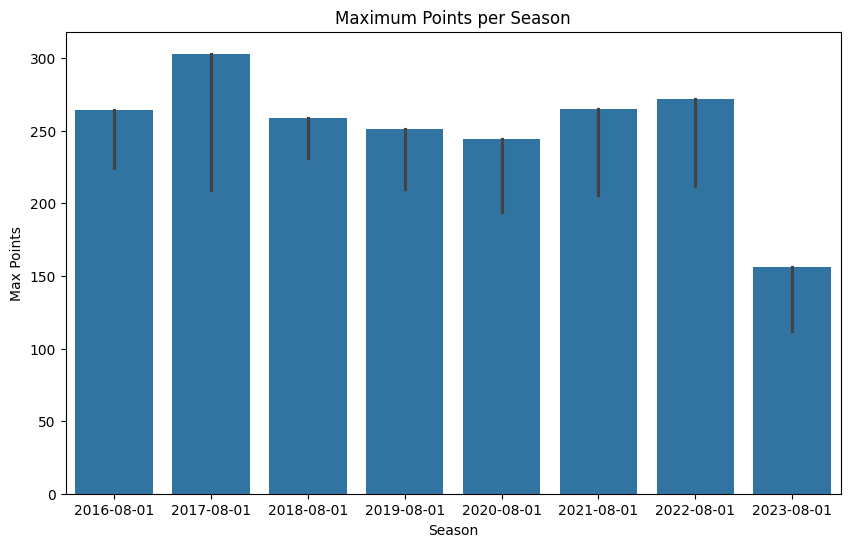

In [26]:
#Bar chart for max points per season
plt.figure(figsize=(10, 6))

sns.barplot(x='Season', y='Pts', data=historical_data, estimator=max)

plt.title('Maximum Points per Season')
plt.xlabel('Season')
plt.ylabel('Max Points')
plt.show()